In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ctl_300 = xr.open_dataset('./../data_isca/t42_300_ga7_alb0.3_clim.nc')
ctl_1200 = xr.open_dataset('./../data_isca/t42_1200_ga7_alb0.3_clim.nc')
ctl_4800 = xr.open_dataset('./../data_isca/t42_4800_ga7_alb0.3_clim.nc')

ctl_300 = ctl_300.where(ctl_300<1e19,np.nan)
ctl_1200 = ctl_1200.where(ctl_1200<1e19,np.nan)
ctl_4800 = ctl_4800.where(ctl_4800<1e19,np.nan)
diff_1200 = ctl_1200 - ctl_300
diff_4800 = ctl_4800 - ctl_1200

ctl_300_ml2 = xr.open_dataset('./../data_isca/t42_300_ga7_alb0.3_aquaml2_clim.nc')
ctl_1200_ml2 = xr.open_dataset('./../data_isca/t42_1200_ga7_alb0.3_aquaml2_clim.nc')
ctl_300_ml20 = xr.open_dataset('./../data_isca/t42_300_ga7_alb0.3_aquaml20_clim.nc')
ctl_1200_ml20 = xr.open_dataset('./../data_isca/t42_1200_ga7_alb0.3_aquaml20_clim.nc')

ctl_300_ml2 = ctl_300_ml2.where(ctl_300_ml2<1e19,np.nan)
ctl_1200_ml2 = ctl_1200_ml2.where(ctl_1200_ml2<1e19,np.nan)
ctl_300_ml20 = ctl_300_ml20.where(ctl_300_ml20<1e19,np.nan)
ctl_1200_ml20 = ctl_1200_ml20.where(ctl_1200_ml20<1e19,np.nan)
diff_ml2 = ctl_1200_ml2-ctl_300_ml2
diff_ml20 = ctl_1200_ml20-ctl_300_ml20

In [4]:
ctl_300_nointerp = xr.open_dataset('./../data_isca/t42_300_ga7_alb0.3_mean_nointerp.nc')
ctl_1200_nointerp = xr.open_dataset('./../data_isca/t42_1200_ga7_alb0.3_mean_nointerp.nc')
ctl_4800_nointerp = xr.open_dataset('./../data_isca/t42_4800_ga7_alb0.3_mean_nointerp.nc')

In [5]:
land=ctl_300.ml_heat_cap.mean('months') < 8257740
ocean=ctl_300.ml_heat_cap.mean('months') > 8257740
weights = np.cos(np.deg2rad(ctl_300.lat))
weights.name = "weights"

In [6]:
def mse_flux(data, time_coord='time'):
    grav = 9.80  # Gravitational acceleration
    rdgas = 287.04 # Gas constant for dry air
    kappa = 2./7.  # rdgas/cp_air
    cp_air = rdgas/kappa  # Specific heat capacity of dry air at constant pressure
    a = 6376.0e3  # Earth radius
    L = 2.500e6  # Latent heat of vaporisation

    # Evaluate moist static energy (cpT + Lq + gz) flux into the column by mean flow
    mse_2d = +cp_air * data.vcomp_temp.mean((time_coord,'lon')) + L * data.sphum_v.mean((time_coord,'lon')) +grav * data.vcomp_height.mean((time_coord,'lon'))
    moist_2d = L * data.sphum_v.mean((time_coord,'lon'))
    dry_2d = cp_air * data.vcomp_temp.mean((time_coord,'lon')) + grav * data.vcomp_height.mean((time_coord,'lon'))

    pfull_diff = np.gradient(data.pfull.values)*100
    pfull_diff_xar = xr.DataArray(pfull_diff, dims='pfull')

    mse = (mse_2d*pfull_diff_xar).sum(('pfull'))*np.cos(data.lat*np.pi/180)*2*np.pi*a/grav/1e15
    moist = (moist_2d*pfull_diff_xar).sum(('pfull'))*np.cos(data.lat*np.pi/180)*2*np.pi*a/grav/1e15
    dry = (dry_2d*pfull_diff_xar).sum(('pfull'))*np.cos(data.lat*np.pi/180)*2*np.pi*a/grav/1e15
    
    return mse,moist,dry

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


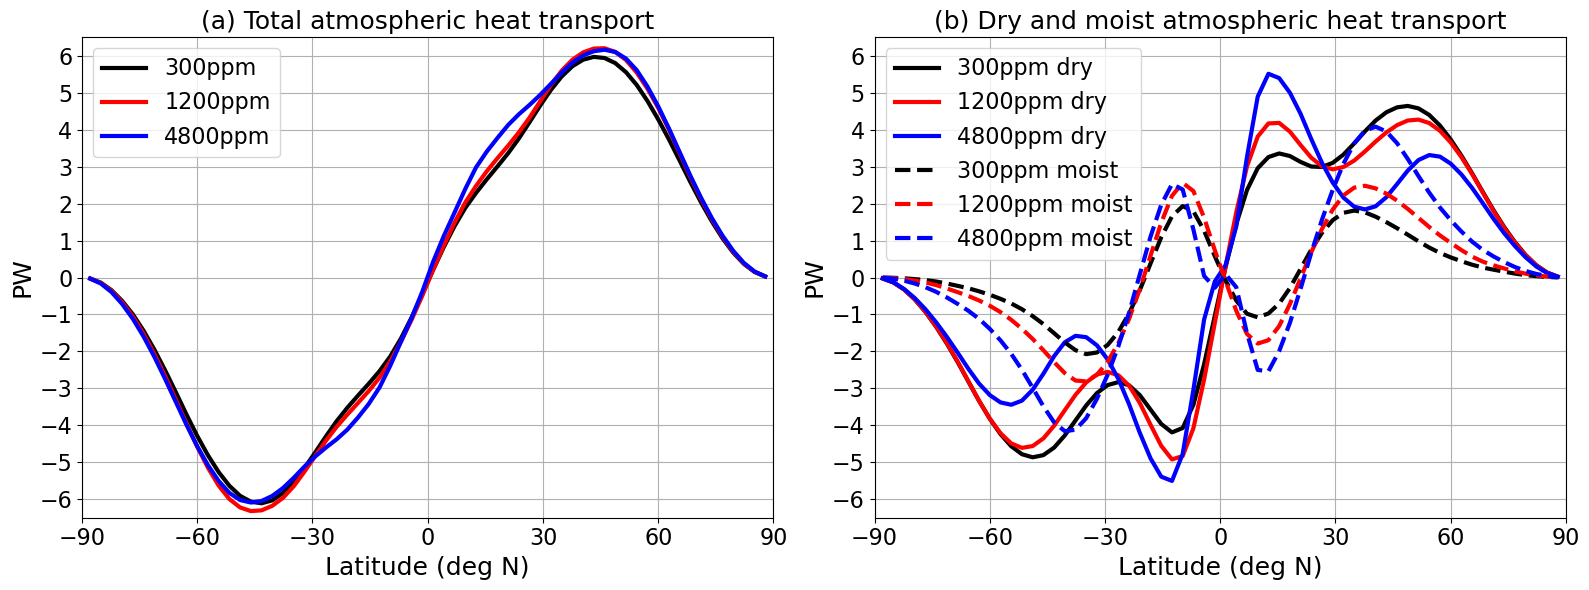

In [28]:
mse_300,moist_300,dry_300 = mse_flux(ctl_300_nointerp, time_coord='months')
mse_1200,moist_1200,dry_1200 = mse_flux(ctl_1200_nointerp, time_coord='months')
mse_4800,moist_4800,dry_4800 = mse_flux(ctl_4800_nointerp, time_coord='months')

plt.figure(figsize=(16, 6),dpi=100)
plt.subplot(121)
mse_300.plot(lw=3,c='k',label='300ppm')
mse_1200.plot(lw=3,c='r',label='1200ppm')
mse_4800.plot(lw=3,c='b',label='4800ppm')
plt.grid()
plt.xlim([-90,90])
plt.ylim([-6.5,6.5])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(np.linspace(-6,6,13),fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('PW',fontsize=18)
plt.title('(a) Total atmospheric heat transport',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.subplot(122)
dry_300.plot(lw=3,c='k',label='300ppm dry')
dry_1200.plot(lw=3,c='r',label='1200ppm dry')
dry_4800.plot(lw=3,c='b',label='4800ppm dry')
moist_300.plot(lw=3,c='k',label='300ppm moist', ls='--')
moist_1200.plot(lw=3,c='r',label='1200ppm moist', ls='--')
moist_4800.plot(lw=3,c='b',label='4800ppm moist', ls='--')
plt.xlim([-90,90])
plt.ylim([-6.5,6.5])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(np.linspace(-6,6,13),fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('PW',fontsize=18)
plt.title('(b) Dry and moist atmospheric heat transport',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()
plt.tight_layout()
plt.savefig('fig1.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


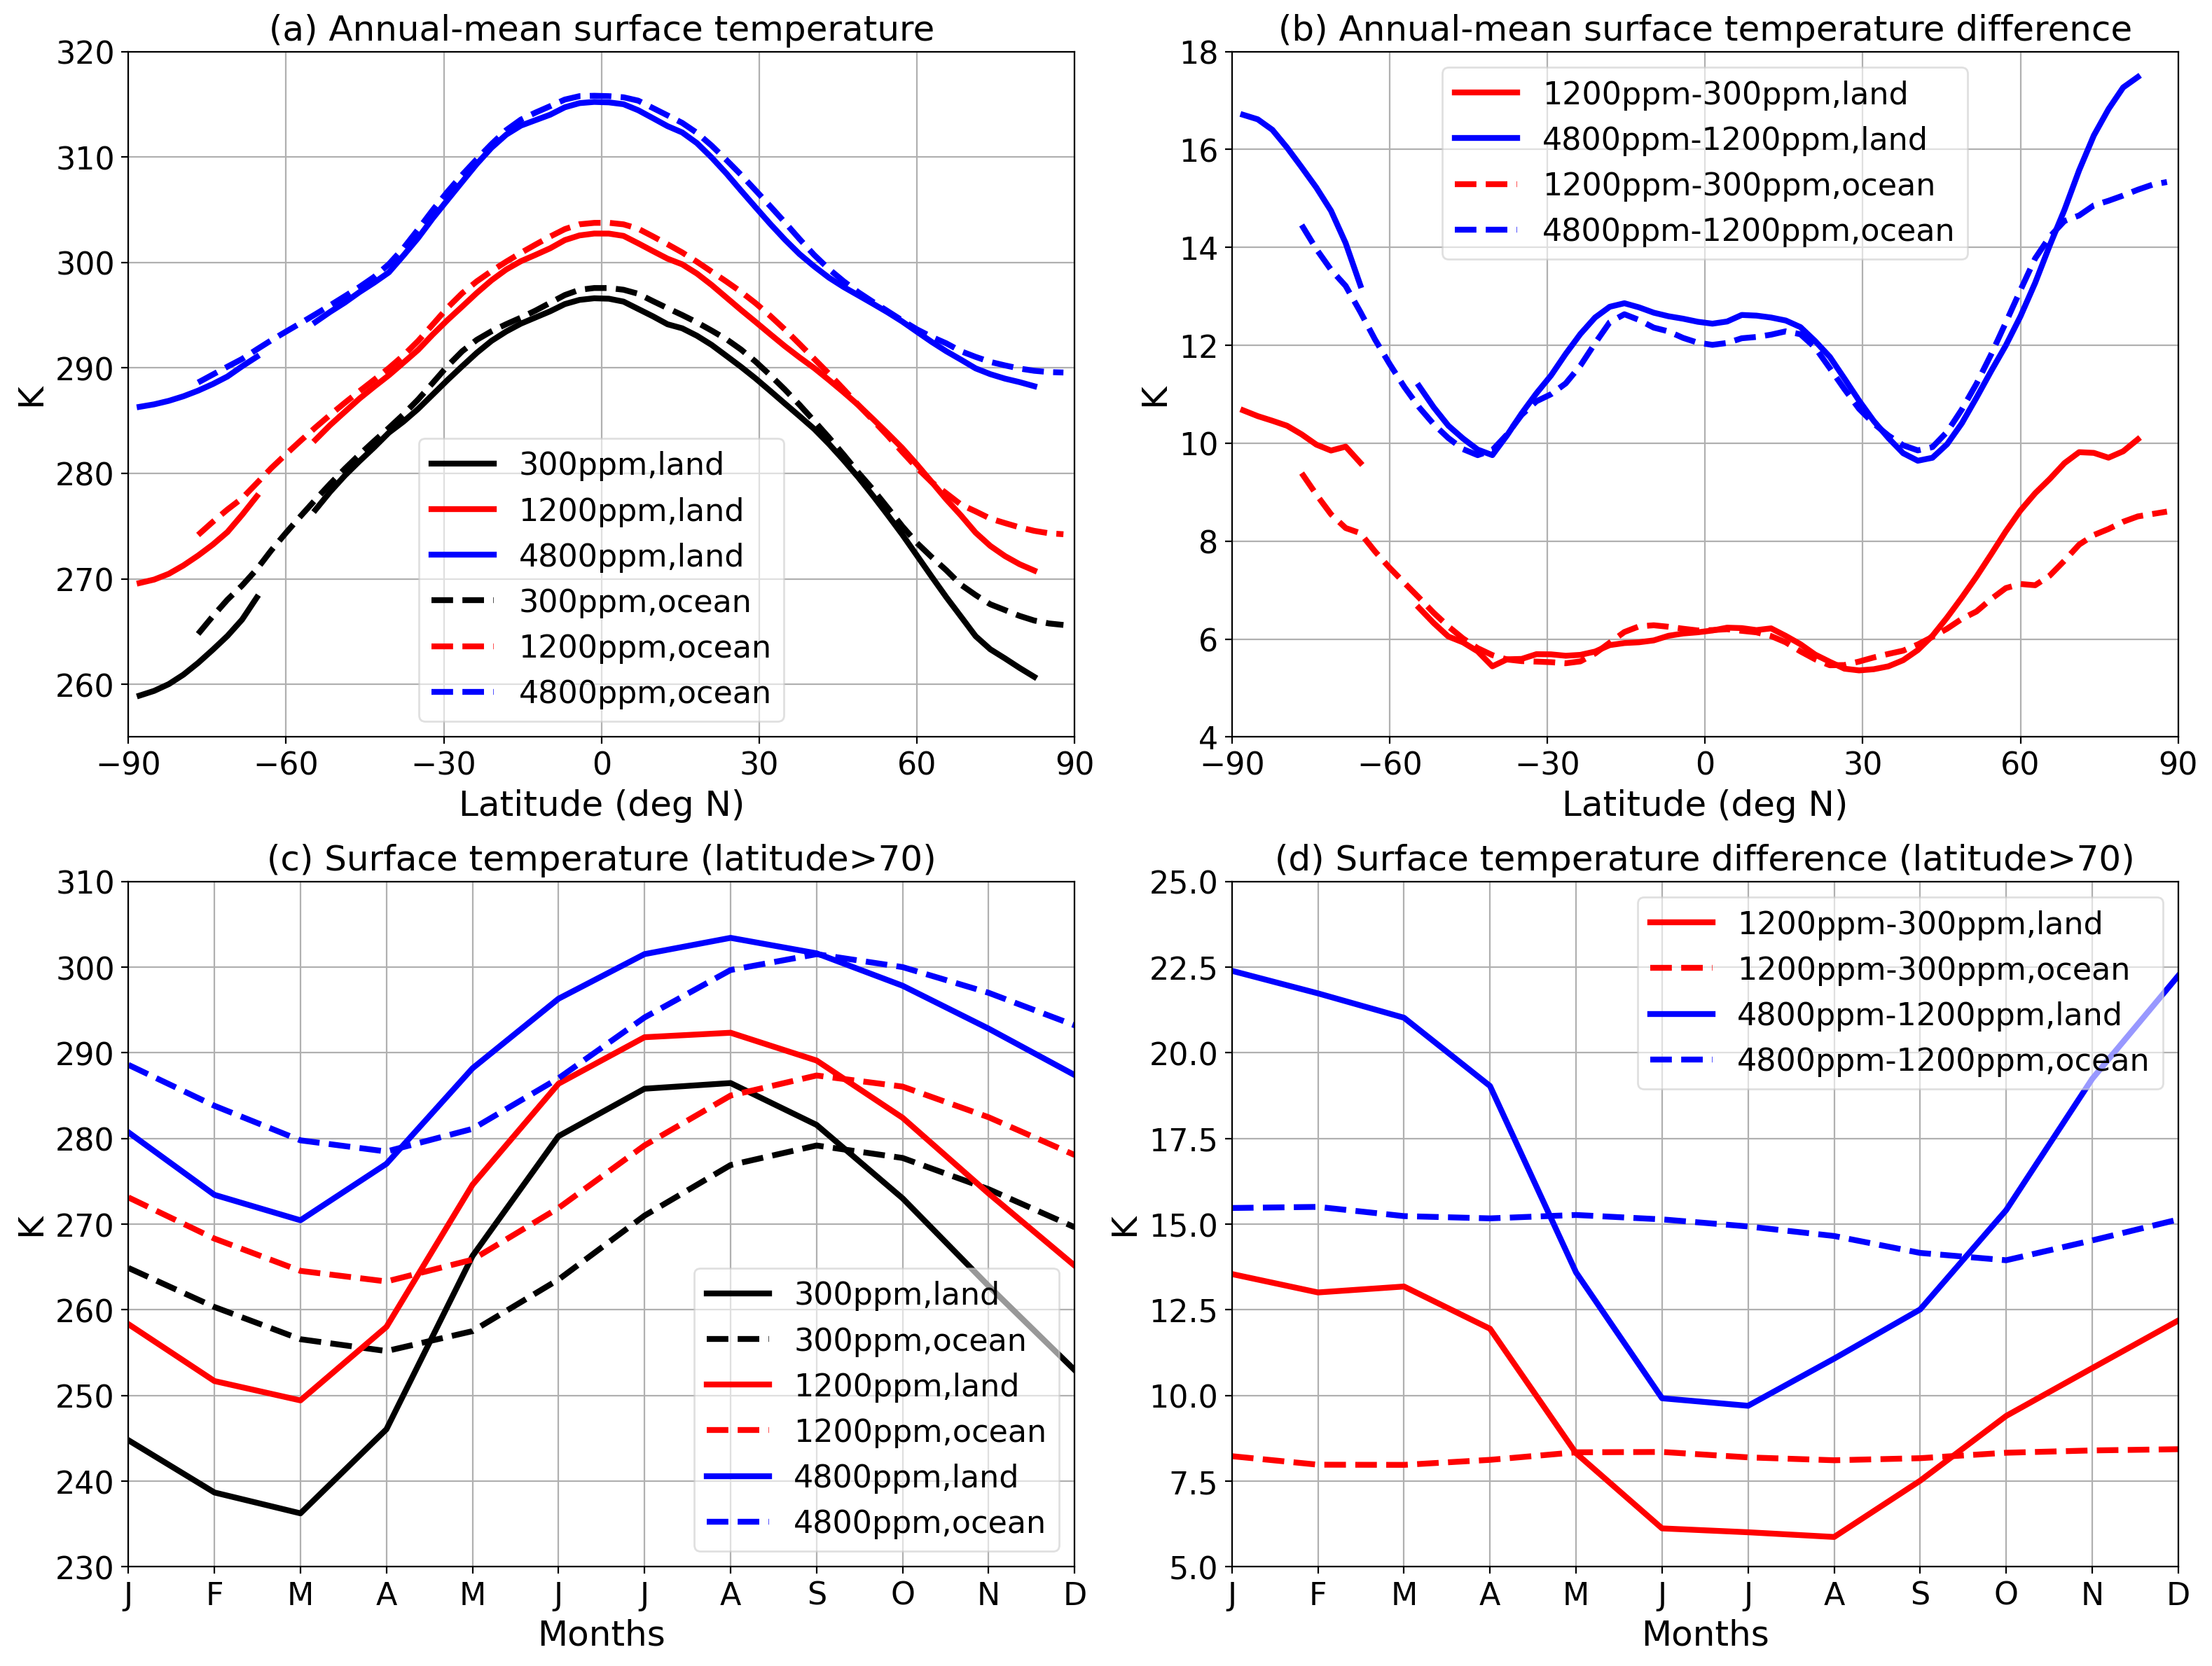

In [20]:
plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
ctl_300.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='k',label='300ppm,land')
ctl_1200.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='r',label='1200ppm,land')
ctl_4800.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='b',label='4800ppm,land')
ctl_300.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='k',label='300ppm,ocean')
ctl_1200.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='r',label='1200ppm,ocean')
ctl_4800.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='b',label='4800ppm,ocean')
plt.xlim([-90,90])
plt.ylim([255,320])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(a) Annual-mean surface temperature',fontsize=18)
plt.legend(loc='best',fontsize=16, framealpha=0.6)
plt.grid()

plt.subplot(222)
diff_1200.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='r',label='1200ppm-300ppm,land')
diff_4800.t_surf.where(land).mean(('lon','months')).plot(lw=3,c='b',label='4800ppm-1200ppm,land')
diff_1200.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='r',label='1200ppm-300ppm,ocean')
diff_4800.t_surf.where(ocean).mean(('lon','months')).plot(lw=3,ls='--',c='b',label='4800ppm-1200ppm,ocean')
plt.xlim([-90,90])
plt.ylim([4,18])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(b) Annual-mean surface temperature difference',fontsize=18)
plt.legend(loc='best',fontsize=16, framealpha=0.6)
plt.grid()

plt.subplot(223)
ctl_300.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',label='300ppm,land')
ctl_300.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',ls='--',label='300ppm,ocean')
ctl_1200.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='1200ppm,land')
ctl_1200.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='1200ppm,ocean')
ctl_4800.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='4800ppm,land')
ctl_4800.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='4800ppm,ocean')
plt.xlim([1,12])
plt.ylim([230,310])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(c) Surface temperature (latitude>70)',fontsize=18)
plt.legend(loc='best',fontsize=16, framealpha=0.6)
plt.grid()

plt.subplot(224)
diff_1200.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='1200ppm-300ppm,land')
diff_1200.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='1200ppm-300ppm,ocean')
diff_4800.t_surf.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',label='4800ppm-1200ppm,land')
diff_4800.t_surf.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='b',ls='--',label='4800ppm-1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([5,25])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(d) Surface temperature difference (latitude>70)',fontsize=18)
plt.legend(loc='best',fontsize=16, framealpha=0.6)
plt.grid()

plt.tight_layout()
plt.savefig('fig2.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


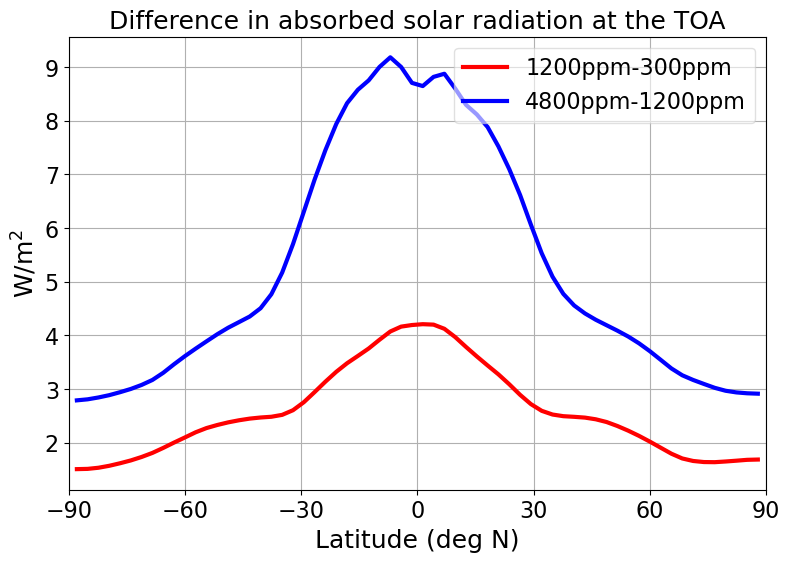

In [19]:
plt.figure(figsize=(9, 6),dpi=100)
diff_1200.soc_toa_sw.mean(('lon','months')).plot(lw=3,c='r',label='1200ppm-300ppm')
diff_4800.soc_toa_sw.mean(('lon','months')).plot(lw=3,c='b',label='4800ppm-1200ppm')
plt.xlim([-90,90])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('Difference in absorbed solar radiation at the TOA',fontsize=18)
plt.legend(loc='best',fontsize=16, framealpha=0.6)
plt.grid()
plt.savefig('fig3.eps')
plt.show()

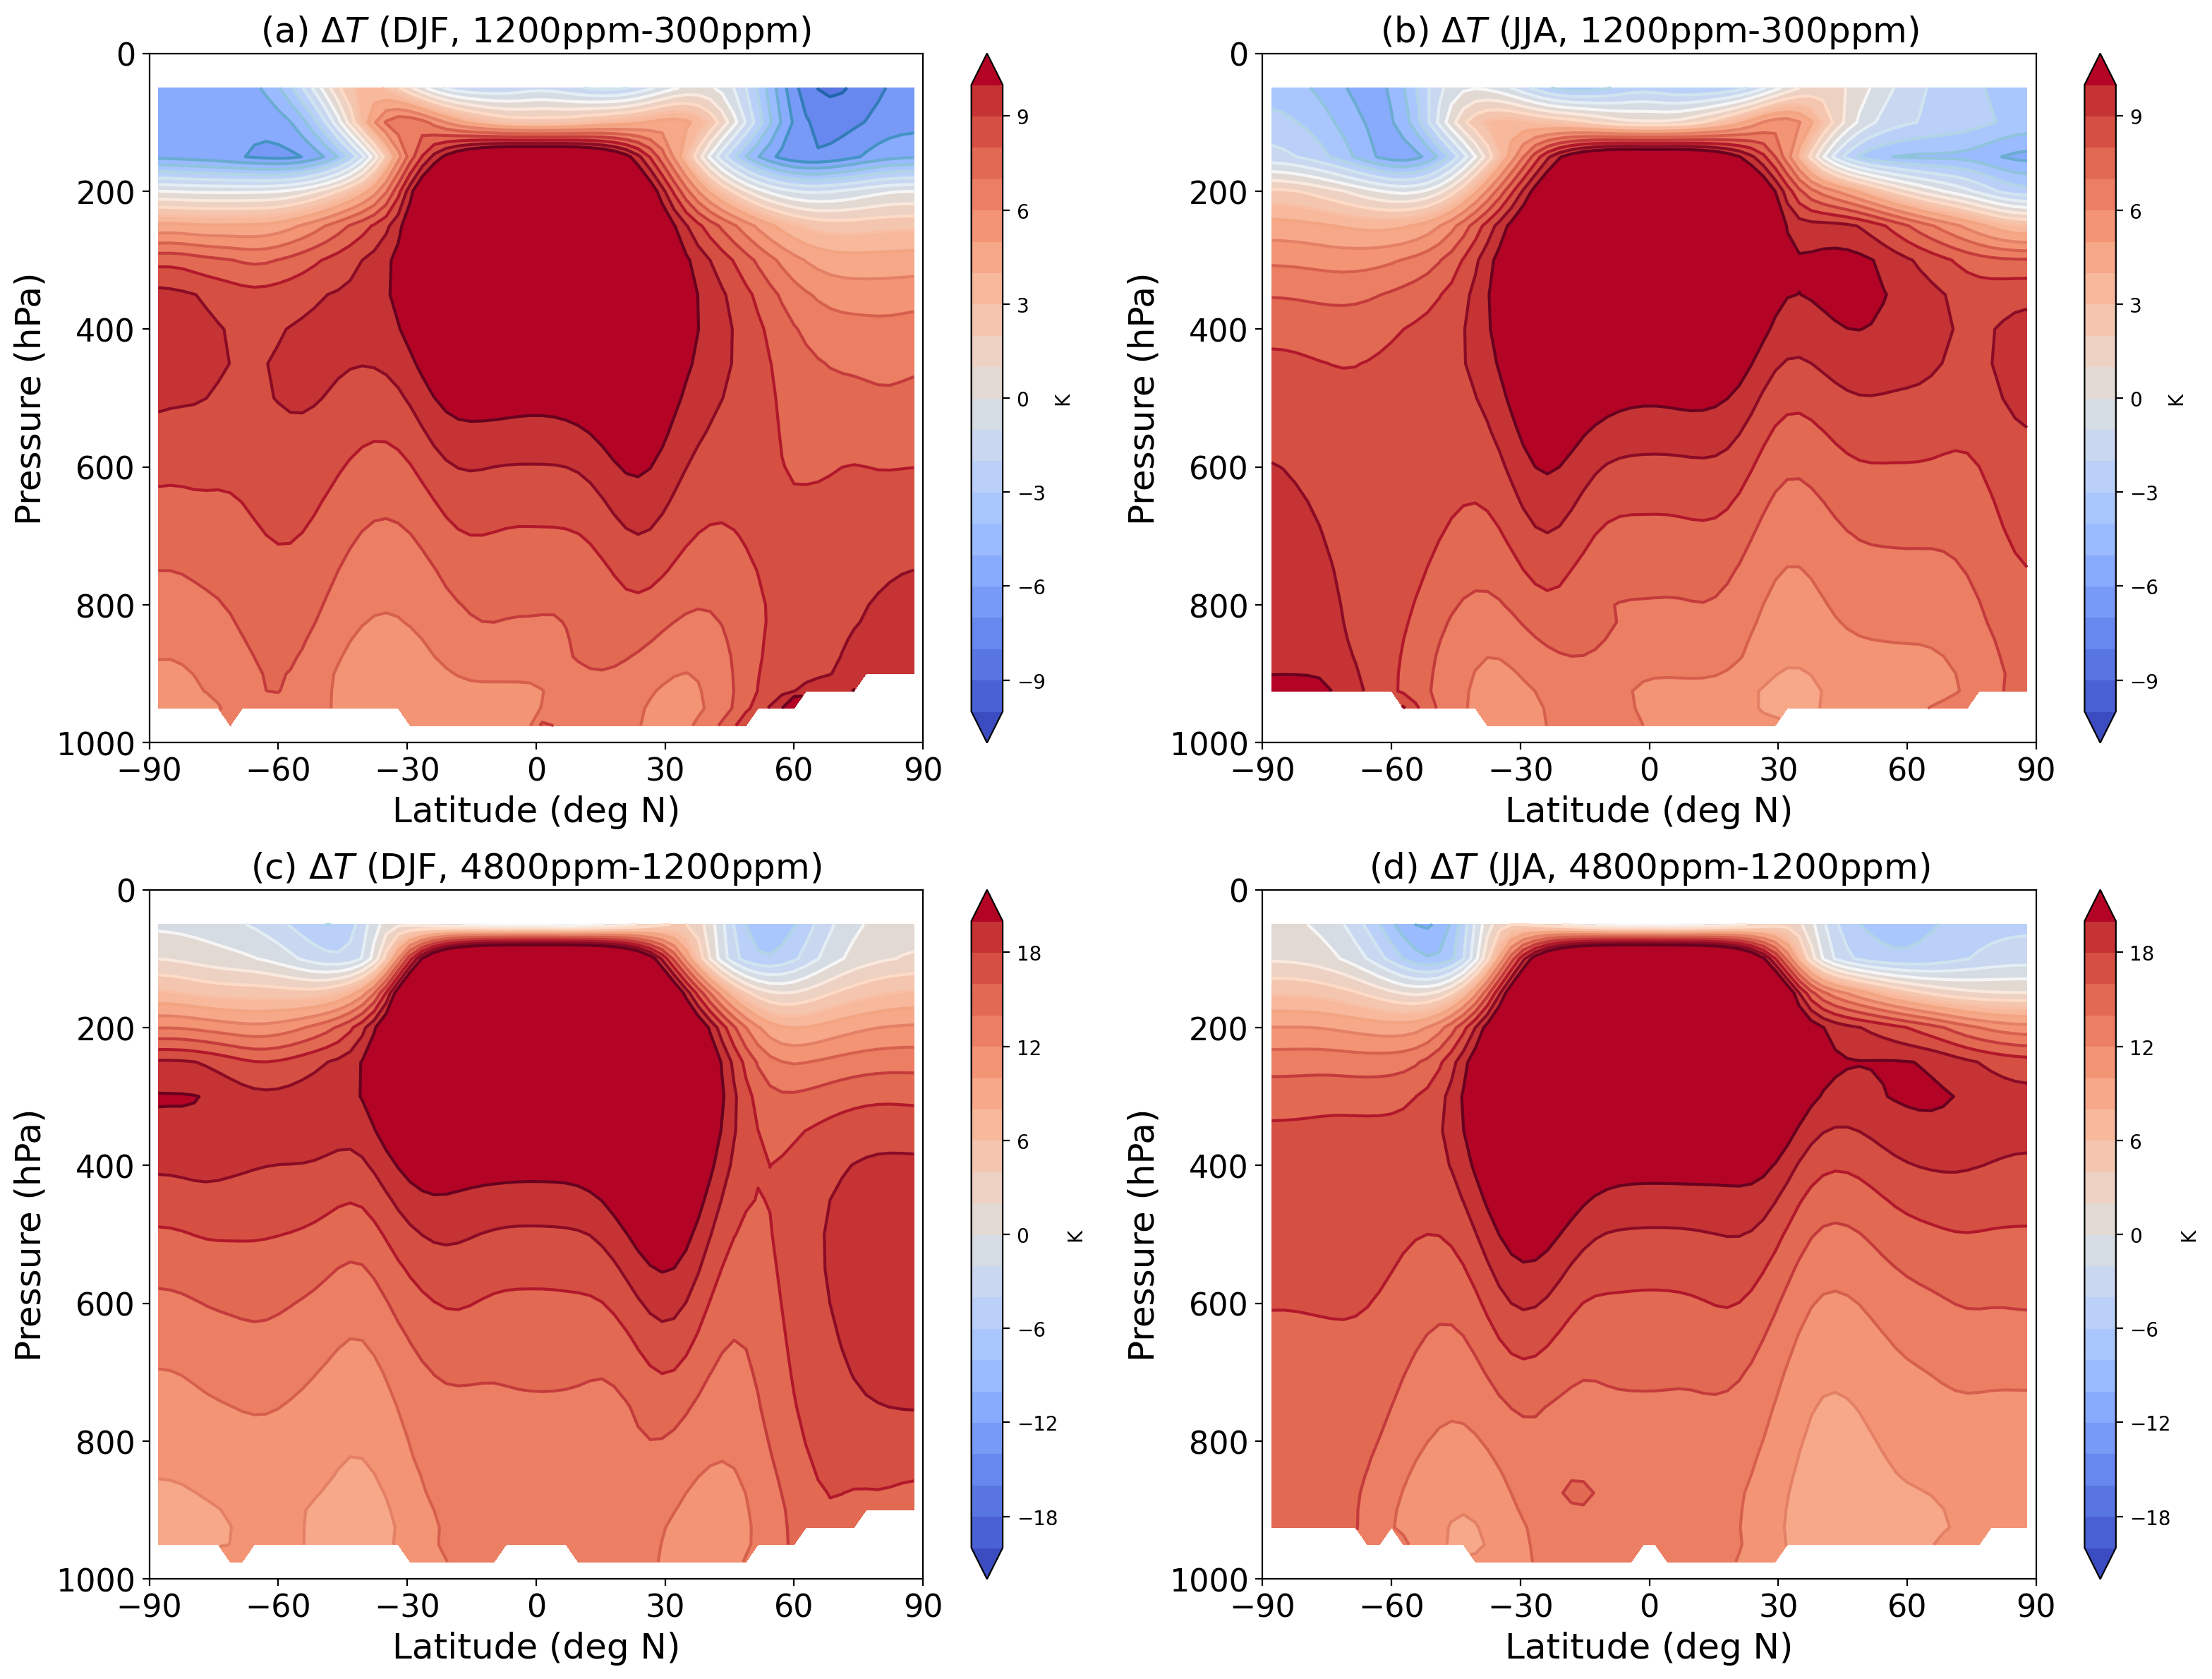

In [10]:
#for size of labels, check this: https://github.com/pydata/xarray/issues/3275

plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
diff_1200.temp.isel(months=[0,1,2]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-10,10,21),extend='both',cmap='coolwarm',cbar_kwargs={"label": "K"})
diff_1200.temp.isel(months=[0,1,2]).mean(('lon','months'),skipna=True).plot.contour(levels=np.linspace(-10,10,21),c='k',lw=4)
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) $\Delta T$ (DJF, 1200ppm-300ppm)',fontsize=18)

plt.subplot(222)
diff_1200.temp.isel(months=[6,7,8]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-10,10,21),extend='both',cmap='coolwarm',cbar_kwargs={"label": "K"})
diff_1200.temp.isel(months=[6,7,8]).mean(('lon','months'),skipna=True).plot.contour(levels=np.linspace(-10,10,21),c='k',lw=4)
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) $\Delta T$ (JJA, 1200ppm-300ppm)',fontsize=18)

plt.subplot(223)
diff_4800.temp.isel(months=[0,1,2]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-20,20,21),extend='both',cmap='coolwarm',cbar_kwargs={"label": "K"})
diff_4800.temp.isel(months=[0,1,2]).mean(('lon','months'),skipna=True).plot.contour(levels=np.linspace(-20,20,21),c='k',lw=4)
plt.xlim([-90,90])
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(c) $\Delta T$ (DJF, 4800ppm-1200ppm)',fontsize=18)

plt.subplot(224)
diff_4800.temp.isel(months=[6,7,8]).mean(('lon','months'),skipna=True).plot.contourf(levels=np.linspace(-20,20,21),extend='both',cmap='coolwarm',cbar_kwargs={"label": "K"})
diff_4800.temp.isel(months=[6,7,8]).mean(('lon','months'),skipna=True).plot.contour(levels=np.linspace(-20,20,21),c='k',lw=4)
plt.ylim([1000,0])
plt.xticks(np.linspace(-90,90,7),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Latitude (deg N)',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(d) $\Delta T$ (JJA, 4800ppm-1200ppm)',fontsize=18)

plt.tight_layout()
plt.savefig('fig4.eps')
plt.show()

In [11]:
# Get CMIP6 plot

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


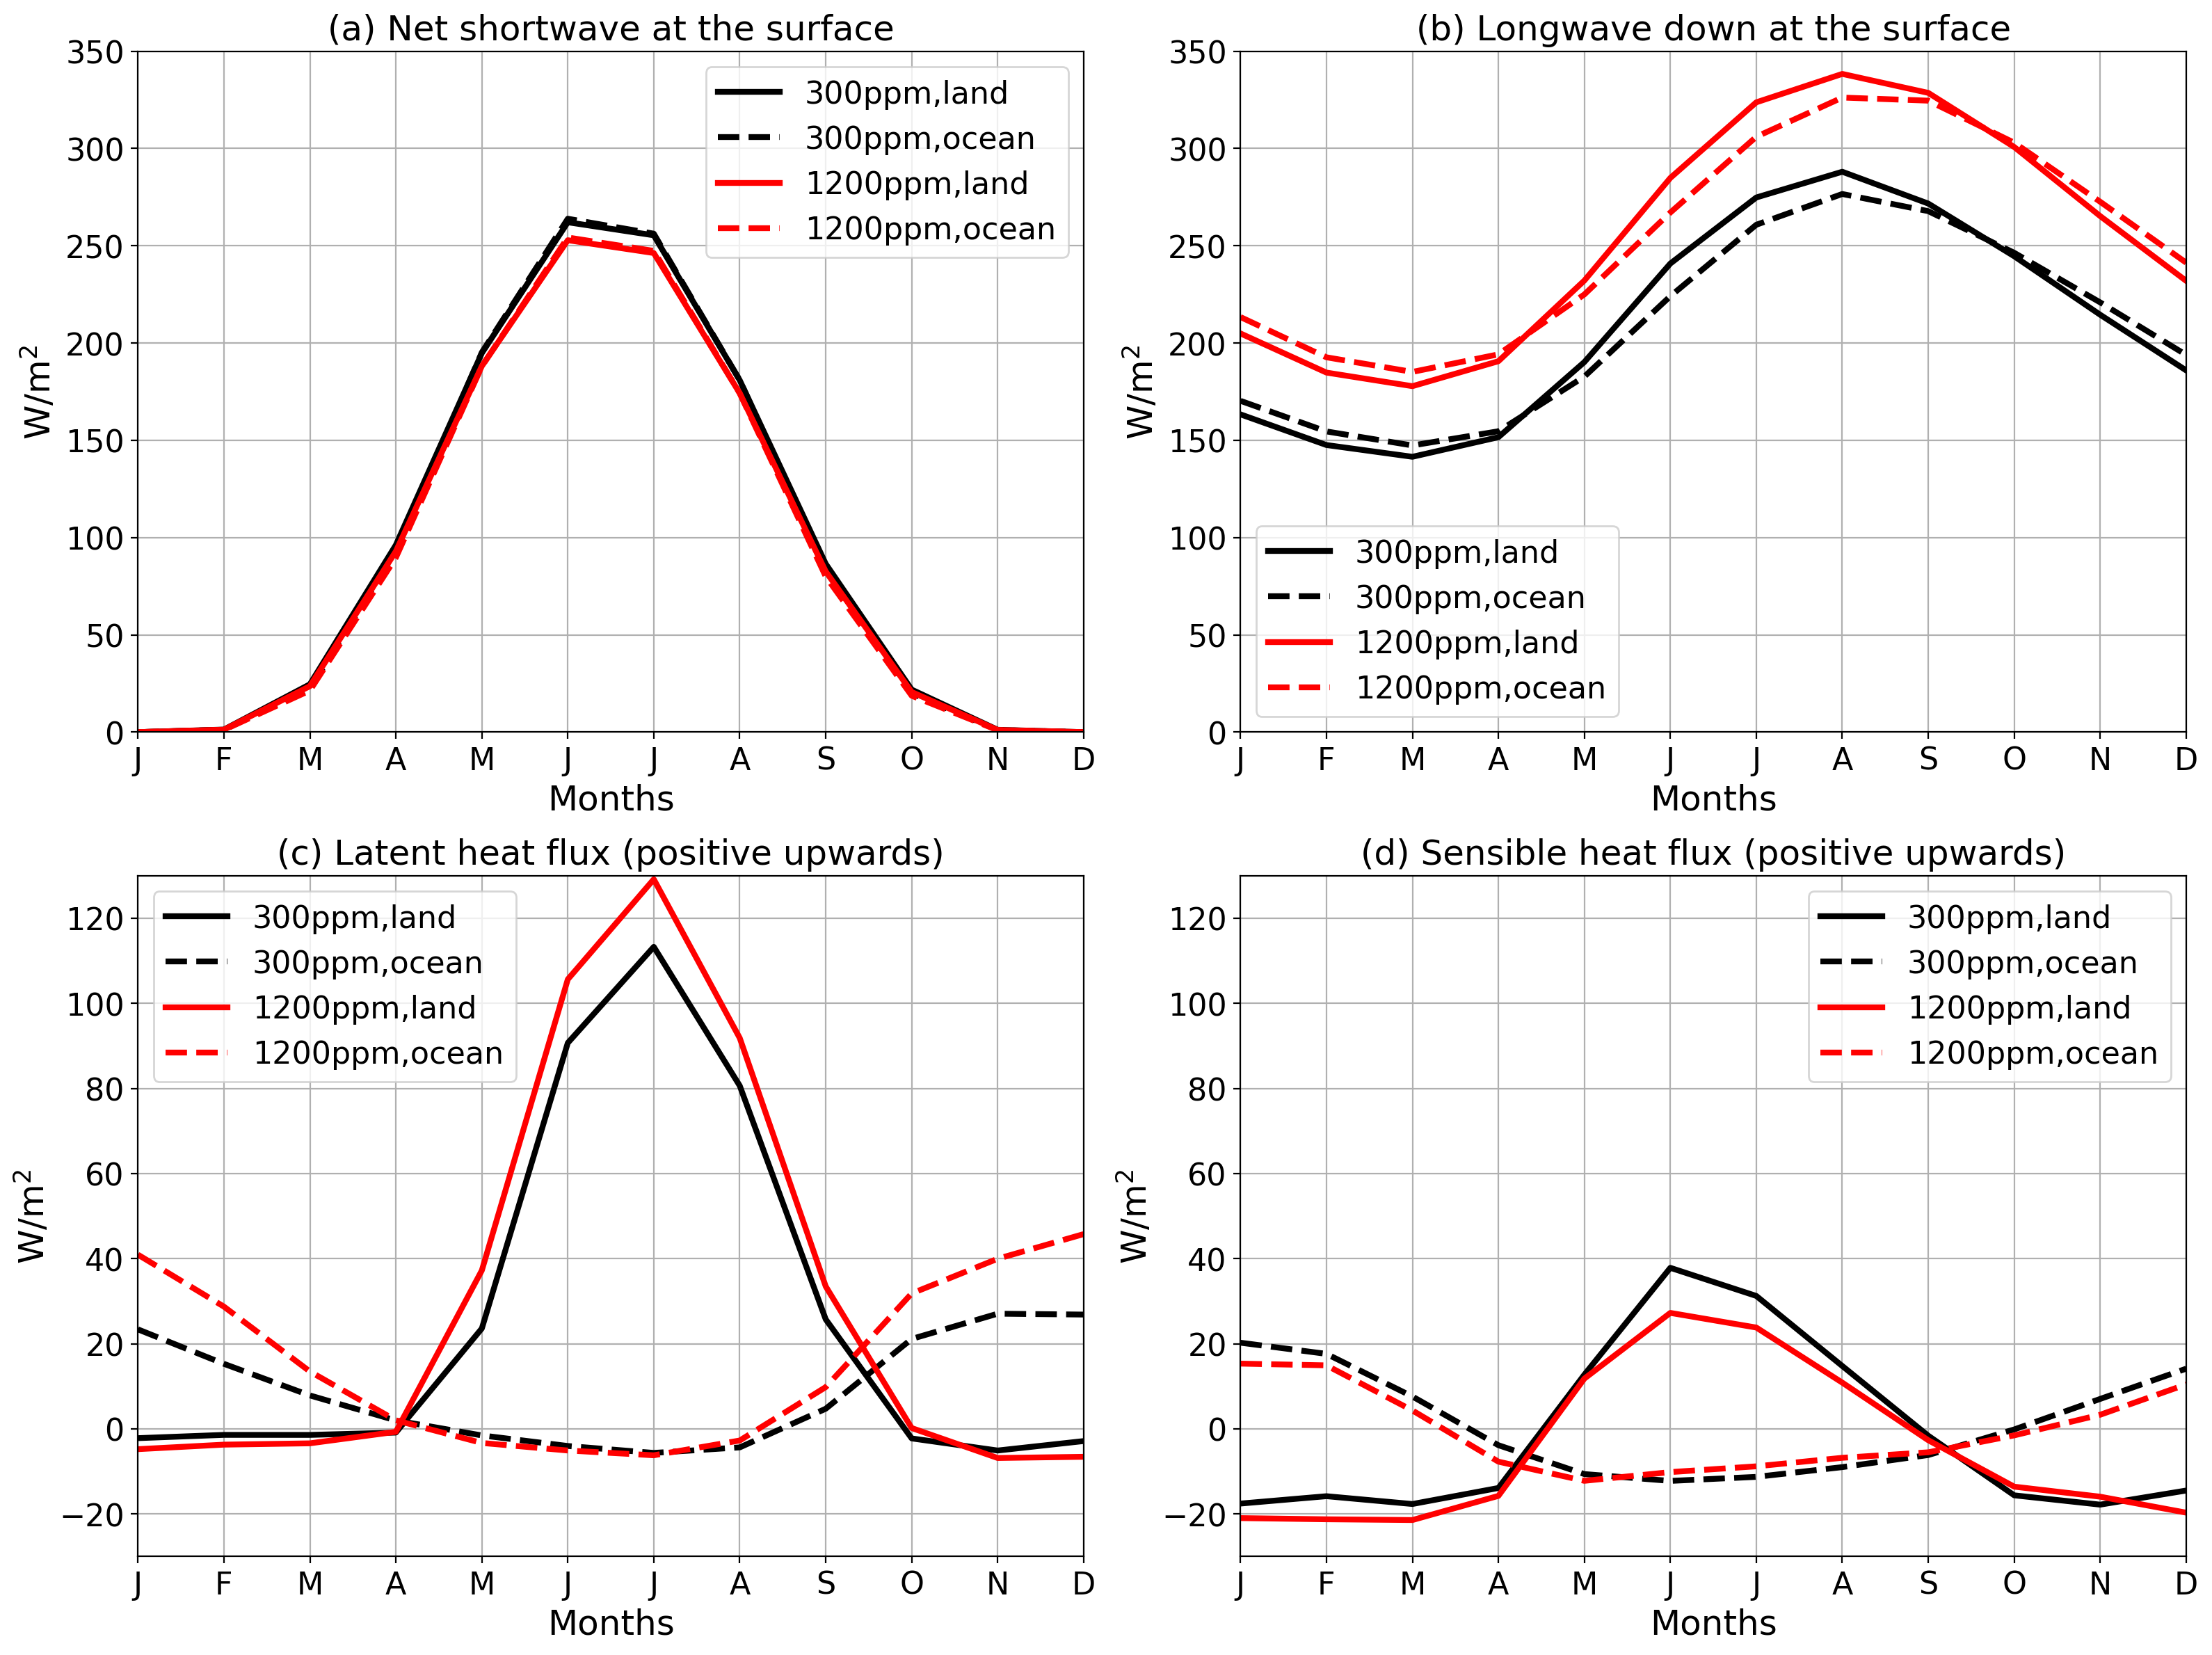

In [12]:
plt.figure(figsize=(16, 12),dpi=200)
plt.subplot(221)
ctl_300.soc_surf_flux_sw.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',label='300ppm,land')
ctl_300.soc_surf_flux_sw.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',ls='--',label='300ppm,ocean')
ctl_1200.soc_surf_flux_sw.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='1200ppm,land')
ctl_1200.soc_surf_flux_sw.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([0,350])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(a) Net shortwave at the surface',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(222)
ctl_300.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',label='300ppm,land')
ctl_300.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',ls='--',label='300ppm,ocean')
ctl_1200.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='1200ppm,land')
ctl_1200.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([0,350])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(b) Longwave down at the surface',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(223)
ctl_300.flux_lhe.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',label='300ppm,land')
ctl_300.flux_lhe.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',ls='--',label='300ppm,ocean')
ctl_1200.flux_lhe.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='1200ppm,land')
ctl_1200.flux_lhe.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([-30,130])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(c) Latent heat flux (positive upwards)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(224)
ctl_300.flux_t.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',label='300ppm,land')
ctl_300.flux_t.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='k',ls='--',label='300ppm,ocean')
ctl_1200.flux_t.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='1200ppm,land')
ctl_1200.flux_t.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='1200ppm,ocean')
plt.xlim([1,12])
plt.ylim([-30,130])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('W/m$^2$',fontsize=18)
plt.title('(d) Sensible heat flux (positive upwards)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('fig6.eps')
plt.show()

In [13]:
sw_300_land = ctl_300.soc_surf_flux_sw.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
sw_300_ocean = ctl_300.soc_surf_flux_sw.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
sw_1200_land = ctl_1200.soc_surf_flux_sw.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
sw_1200_ocean = ctl_1200.soc_surf_flux_sw.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lw_300_land = ctl_300.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lw_300_ocean = ctl_300.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lw_1200_land = ctl_1200.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lw_1200_ocean = ctl_1200.soc_surf_flux_lw_down.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lhe_300_land = ctl_300.flux_lhe.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lhe_300_ocean = ctl_300.flux_lhe.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lhe_1200_land = ctl_1200.flux_lhe.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
lhe_1200_ocean = ctl_1200.flux_lhe.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
t_300_land = ctl_300.flux_t.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
t_300_ocean = ctl_300.flux_t.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
t_1200_land = ctl_1200.flux_t.where(ctl_300.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)
t_1200_ocean = ctl_1200.flux_t.where(ctl_300.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False)

C_land = 8.3e6
C_ocean = 8.3e7

dt = 3600*24*30
timesteps = 10
ts = 200

ts_300_land = sw_300_land*0
ts_300_ocean = sw_300_land*0
ts_1200_land = sw_300_land*0
ts_1200_ocean = sw_300_land*0

for j in np.arange(2):
    for month in np.arange(12):
        i=0
        while(i<timesteps):
            ts += (sw_300_land[month]+lw_300_land[month]-5.67e-8*ts**4-lhe_300_land[month]-t_300_land[month])/C_land*dt/timesteps
            i+=1
        ts_300_land[month]=ts
        
for j in np.arange(2):
    for month in np.arange(12):
        i=0
        while(i<timesteps):
            ts += (sw_300_ocean[month]+lw_300_ocean[month]-5.67e-8*ts**4-lhe_300_ocean[month]-t_300_ocean[month])/C_ocean*dt/timesteps
            i+=1
        ts_300_ocean[month]=ts
        
for j in np.arange(2):
    for month in np.arange(12):
        i=0
        while(i<timesteps):
            ts += (sw_1200_land[month]+lw_1200_land[month]-5.67e-8*ts**4-lhe_1200_land[month]-t_1200_land[month])/C_land*dt/timesteps
            i+=1
        ts_1200_land[month]=ts
        
for j in np.arange(2):
    for month in np.arange(12):
        i=0
        while(i<timesteps):
            ts += (sw_1200_ocean[month]+lw_1200_ocean[month]-5.67e-8*ts**4-lhe_1200_ocean[month]-t_1200_ocean[month])/C_ocean*dt/timesteps
            i+=1
        ts_1200_ocean[month]=ts

diff_land = ts_1200_land-ts_300_land
diff_ocean = ts_1200_ocean - ts_300_ocean

ts_300_land_simple = sw_300_land*0
ts_300_ocean_simple = sw_300_land*0
ts_1200_land_simple = sw_300_land*0
ts_1200_ocean_simple = sw_300_land*0

for j in np.arange(2):
    for month in np.arange(12):
        i=0
        while(i<timesteps):
            ts += (sw_300_land[month]+lw_300_land[month]-5.67e-8*ts**4)/C_land*dt/timesteps
            i+=1
        ts_300_land_simple[month]=ts
        
for j in np.arange(2):
    for month in np.arange(12):
        i=0
        while(i<timesteps):
            ts += (sw_300_ocean[month]+lw_300_ocean[month]-5.67e-8*ts**4)/C_ocean*dt/timesteps
            i+=1
        ts_300_ocean_simple[month]=ts
        
for j in np.arange(2):
    for month in np.arange(12):
        i=0
        while(i<timesteps):
            ts += (sw_1200_land[month]+lw_300_land[month]+(lw_1200_land-lw_300_land).mean()-5.67e-8*ts**4)/C_land*dt/timesteps
            i+=1
        ts_1200_land_simple[month]=ts
        
for j in np.arange(2):
    for month in np.arange(12):
        i=0
        while(i<timesteps):
            ts += (sw_1200_ocean[month]+lw_300_ocean[month]+(lw_1200_land-lw_300_land).mean()-5.67e-8*ts**4)/C_ocean*dt/timesteps
            i+=1
        ts_1200_ocean_simple[month]=ts

diff_land_simple = ts_1200_land_simple-ts_300_land_simple
diff_ocean_simple = ts_1200_ocean_simple - ts_300_ocean_simple

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


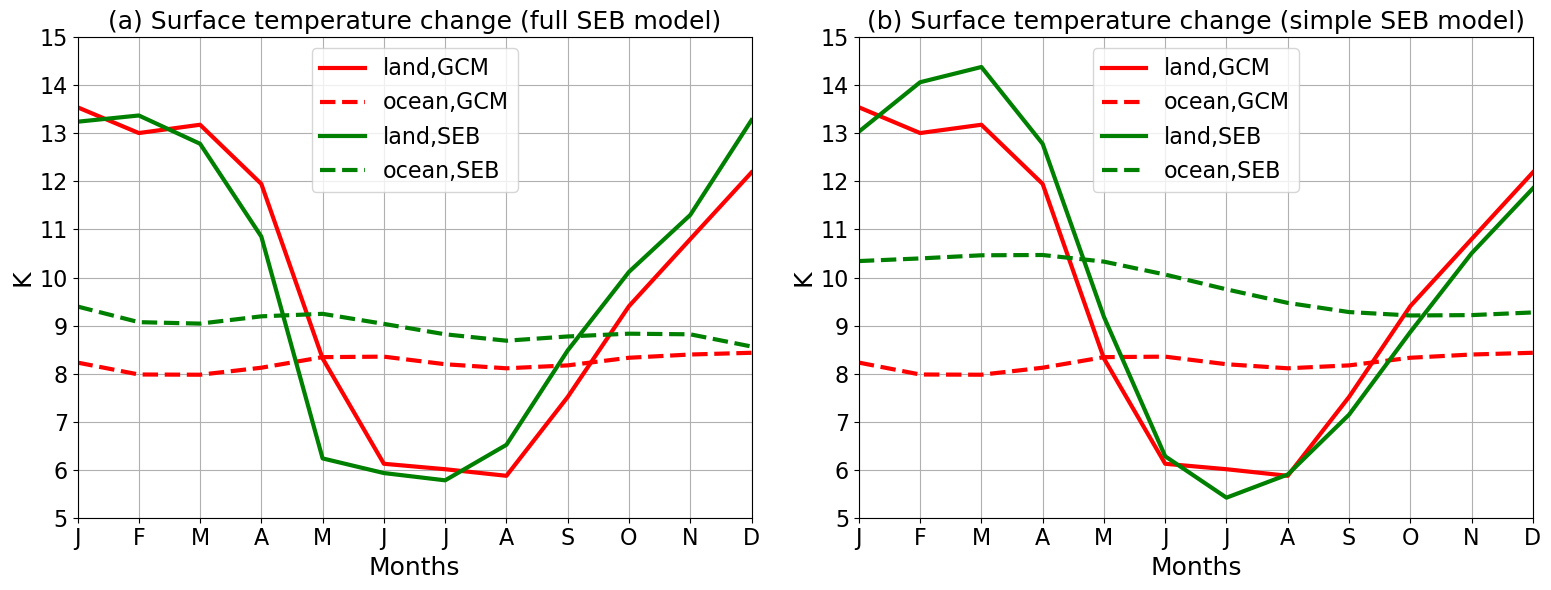

In [14]:
plt.figure(figsize=(16, 6),dpi=100)
plt.subplot(121)
diff_1200.t_surf.where(ctl_1200.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='land,GCM')
diff_1200.t_surf.where(ctl_1200.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='ocean,GCM')
diff_land.plot(lw=3,c='g',label='land,SEB')
diff_ocean.plot(lw=3,c='g',ls='--',label='ocean,SEB')
plt.xlim([1,12])
plt.ylim([5,15])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(np.arange(5,16,1),fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(a) Surface temperature change (full SEB model)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.subplot(122)
diff_1200.t_surf.where(ctl_1200.lat>70).where(land).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',label='land,GCM')
diff_1200.t_surf.where(ctl_1200.lat>70).where(ocean).mean('lon').weighted(weights).mean('lat').roll(months=-1,roll_coords=False).plot(lw=3,c='r',ls='--',label='ocean,GCM')
diff_land_simple.plot(lw=3,c='g',label='land,SEB')
diff_ocean_simple.plot(lw=3,c='g',ls='--',label='ocean,SEB')
plt.xlim([1,12])
plt.ylim([5,15])
plt.xticks(np.arange(1,13,1),['J','F','M','A','M','J','J','A','S','O','N','D'],fontsize=16)
plt.yticks(np.arange(5,16,1),fontsize=16)
plt.xlabel('Months',fontsize=18)
plt.ylabel('K',fontsize=18)
plt.title('(b) Surface temperature change (simple SEB model)',fontsize=18)
plt.legend(loc='best',fontsize=16)
plt.grid()

plt.tight_layout()
plt.savefig('fig7.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


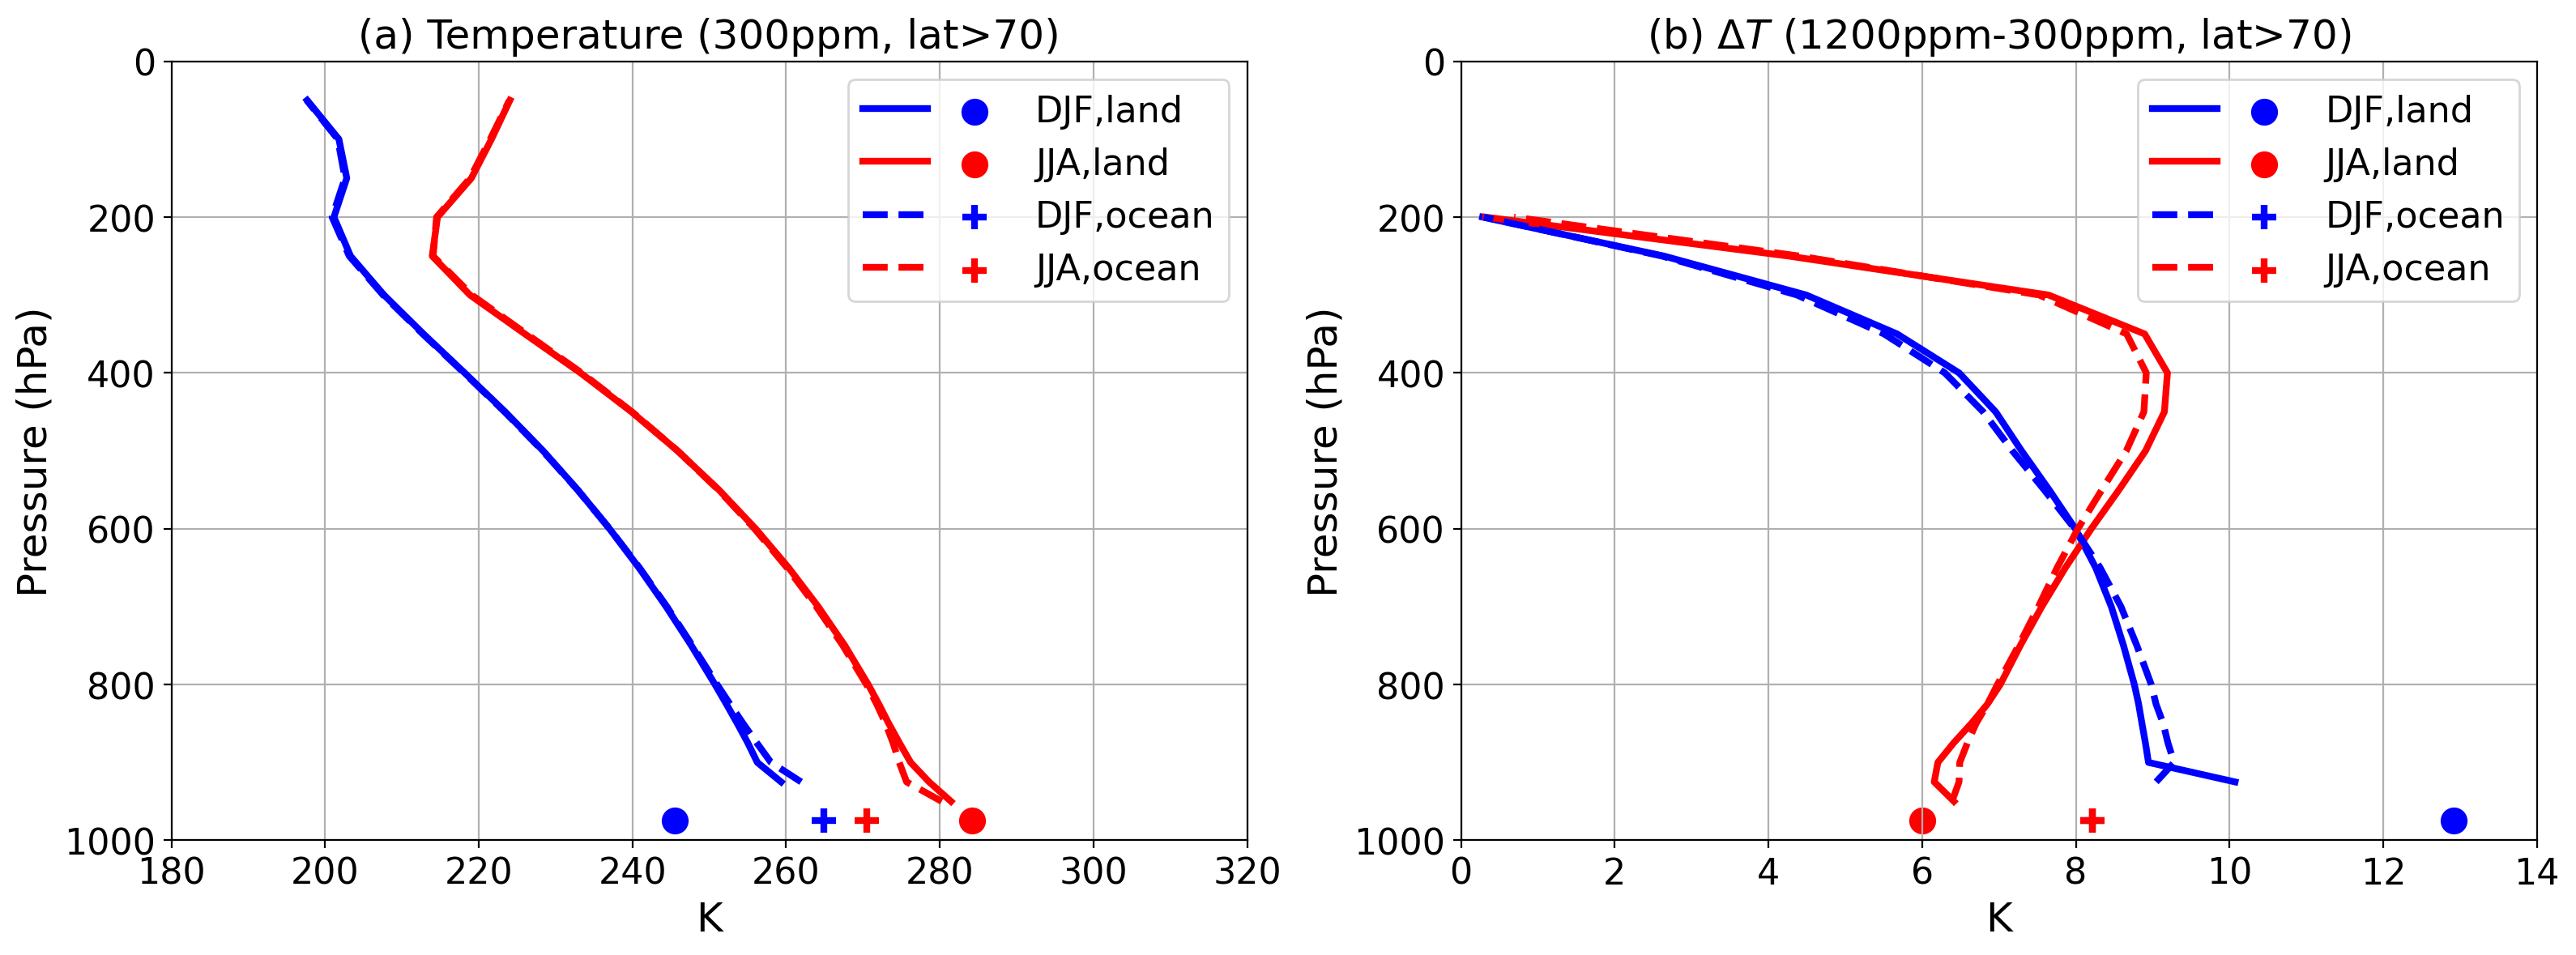

In [15]:
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

plt.figure(figsize=(16, 6),dpi=200)
plt.subplot(121)
p1, = ctl_300.temp.where(ctl_300.temp>0).isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3)
p2, = ctl_300.temp.where(ctl_300.temp>0).isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3)
p3 = plt.scatter(ctl_300.t_surf.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',s=120)
p4 = plt.scatter(ctl_300.t_surf.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',s=120)
p5, = ctl_300.temp.where(ctl_300.temp>0).isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(ls='--',y='pfull',c='b',lw=3)
p6, = ctl_300.temp.where(ctl_300.temp>0).isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(ls='--',y='pfull',c='r',lw=3)
p7 = plt.scatter(ctl_300.t_surf.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',s=120, marker='+',lw=3)
p8 = plt.scatter(ctl_300.t_surf.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',s=120, marker='+',lw=3)
plt.xlim([180,320])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) Temperature (300ppm, lat>70)',fontsize=18)
plt.legend([(p1,p3),(p2,p4),(p5,p7),(p6,p8)],['DJF,land','JJA,land','DJF,ocean','JJA,ocean'],numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)},fontsize=16,loc='best',handlelength=4)
plt.grid()

plt.subplot(122)
p1, = diff_1200.temp.where(diff_1200.temp<100).where(diff_1200.temp>0).isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3)
p2, = diff_1200.temp.where(diff_1200.temp<100).where(diff_1200.temp>0).isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3)
p3 = plt.scatter(diff_1200.t_surf.isel(months=[0,1,2]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',s=120)
p4 = plt.scatter(diff_1200.t_surf.isel(months=[6,7,8]).where(land).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',s=120)
p5, = diff_1200.temp.where(diff_1200.temp<100).where(diff_1200.temp>0).isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(ls='--',y='pfull',c='b',lw=3)
p6, = diff_1200.temp.where(diff_1200.temp<100).where(diff_1200.temp>0).isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(ls='--',y='pfull',c='r',lw=3)
p7 = plt.scatter(diff_1200.t_surf.isel(months=[0,1,2]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',s=120, marker='+',lw=3)
p8 = plt.scatter(diff_1200.t_surf.isel(months=[6,7,8]).where(ocean).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',s=120, marker='+',lw=3)
plt.xlim([0,14])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) $\Delta T$ (1200ppm-300ppm, lat>70)',fontsize=18)
plt.legend([(p1,p3),(p2,p4),(p5,p7),(p6,p8)],['DJF,land','JJA,land','DJF,ocean','JJA,ocean'],numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)},fontsize=16,loc='best',handlelength=4)
plt.grid()

plt.tight_layout()
plt.savefig('fig8.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


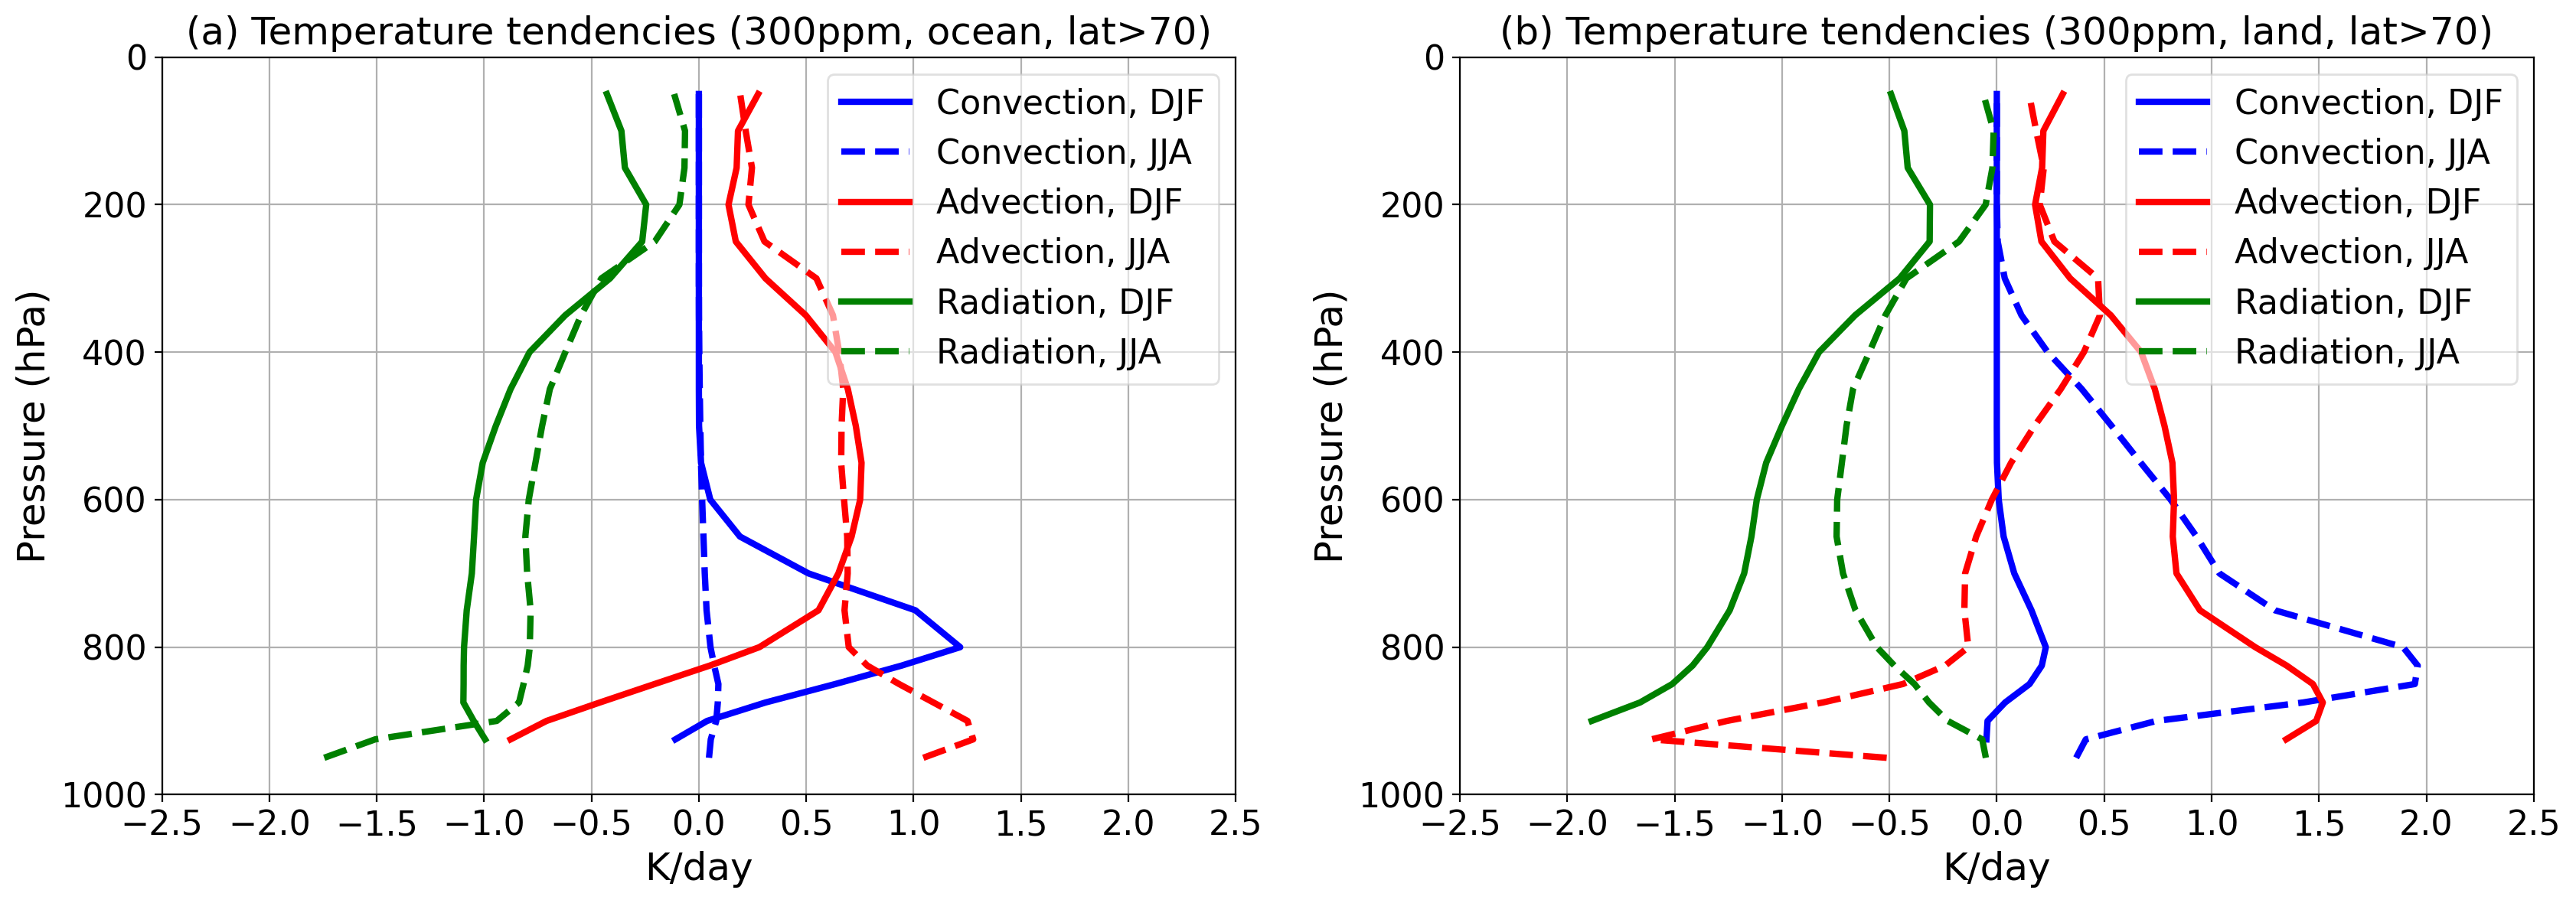

In [16]:
plt.figure(figsize=(17, 6),dpi=200)
plt.subplot(121)
(ctl_300.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='Convection, DJF')
(ctl_300.dt_tg_convection*3600*24).isel(months=[6,7,8]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',ls='--',lw=3,label='Convection, JJA')
(ctl_300.dt_tg_advection*3600*24).isel(months=[0,1,2]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='Advection, DJF')
(ctl_300.dt_tg_advection*3600*24).isel(months=[6,7,8]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',ls='--',lw=3,label='Advection, JJA')
(ctl_300.soc_tdt_rad*3600*24).where(ctl_300.soc_tdt_rad*3600*24>-2).isel(months=[0,1,2]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',lw=3,label='Radiation, DJF')
(ctl_300.soc_tdt_rad*3600*24).where(ctl_300.soc_tdt_rad*3600*24>-2).isel(months=[6,7,8]).mean('months').where(ocean).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',ls='--',lw=3,label='Radiation, JJA')
plt.xlim([-2.5,2.5])
plt.ylim([1000,0])
plt.xticks(np.linspace(-2.5,2.5,11),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K/day',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) Temperature tendencies (300ppm, ocean, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16, framealpha=0.6)
plt.grid()

plt.subplot(122)
(ctl_300.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(land).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='Convection, DJF')
(ctl_300.dt_tg_convection*3600*24).isel(months=[6,7,8]).mean('months').where(land).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',ls='--',lw=3,label='Convection, JJA')
(ctl_300.dt_tg_advection*3600*24).isel(months=[0,1,2]).mean('months').where(land).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='Advection, DJF')
(ctl_300.dt_tg_advection*3600*24).isel(months=[6,7,8]).mean('months').where(land).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',ls='--',lw=3,label='Advection, JJA')
(ctl_300.soc_tdt_rad*3600*24).where(ctl_300.soc_tdt_rad*3600*24>-2).isel(months=[0,1,2]).mean('months').where(land).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',lw=3,label='Radiation, DJF')
(ctl_300.soc_tdt_rad*3600*24).where(ctl_300.soc_tdt_rad*3600*24>-2).isel(months=[6,7,8]).mean('months').where(land).where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',ls='--',lw=3,label='Radiation, JJA')
plt.xlim([-2.5,2.5])
plt.ylim([1000,0])
plt.xticks(np.linspace(-2.5,2.5,11),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K/day',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) Temperature tendencies (300ppm, land, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16, framealpha=0.6)
plt.grid()

plt.tight_layout()
plt.savefig('fig9.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


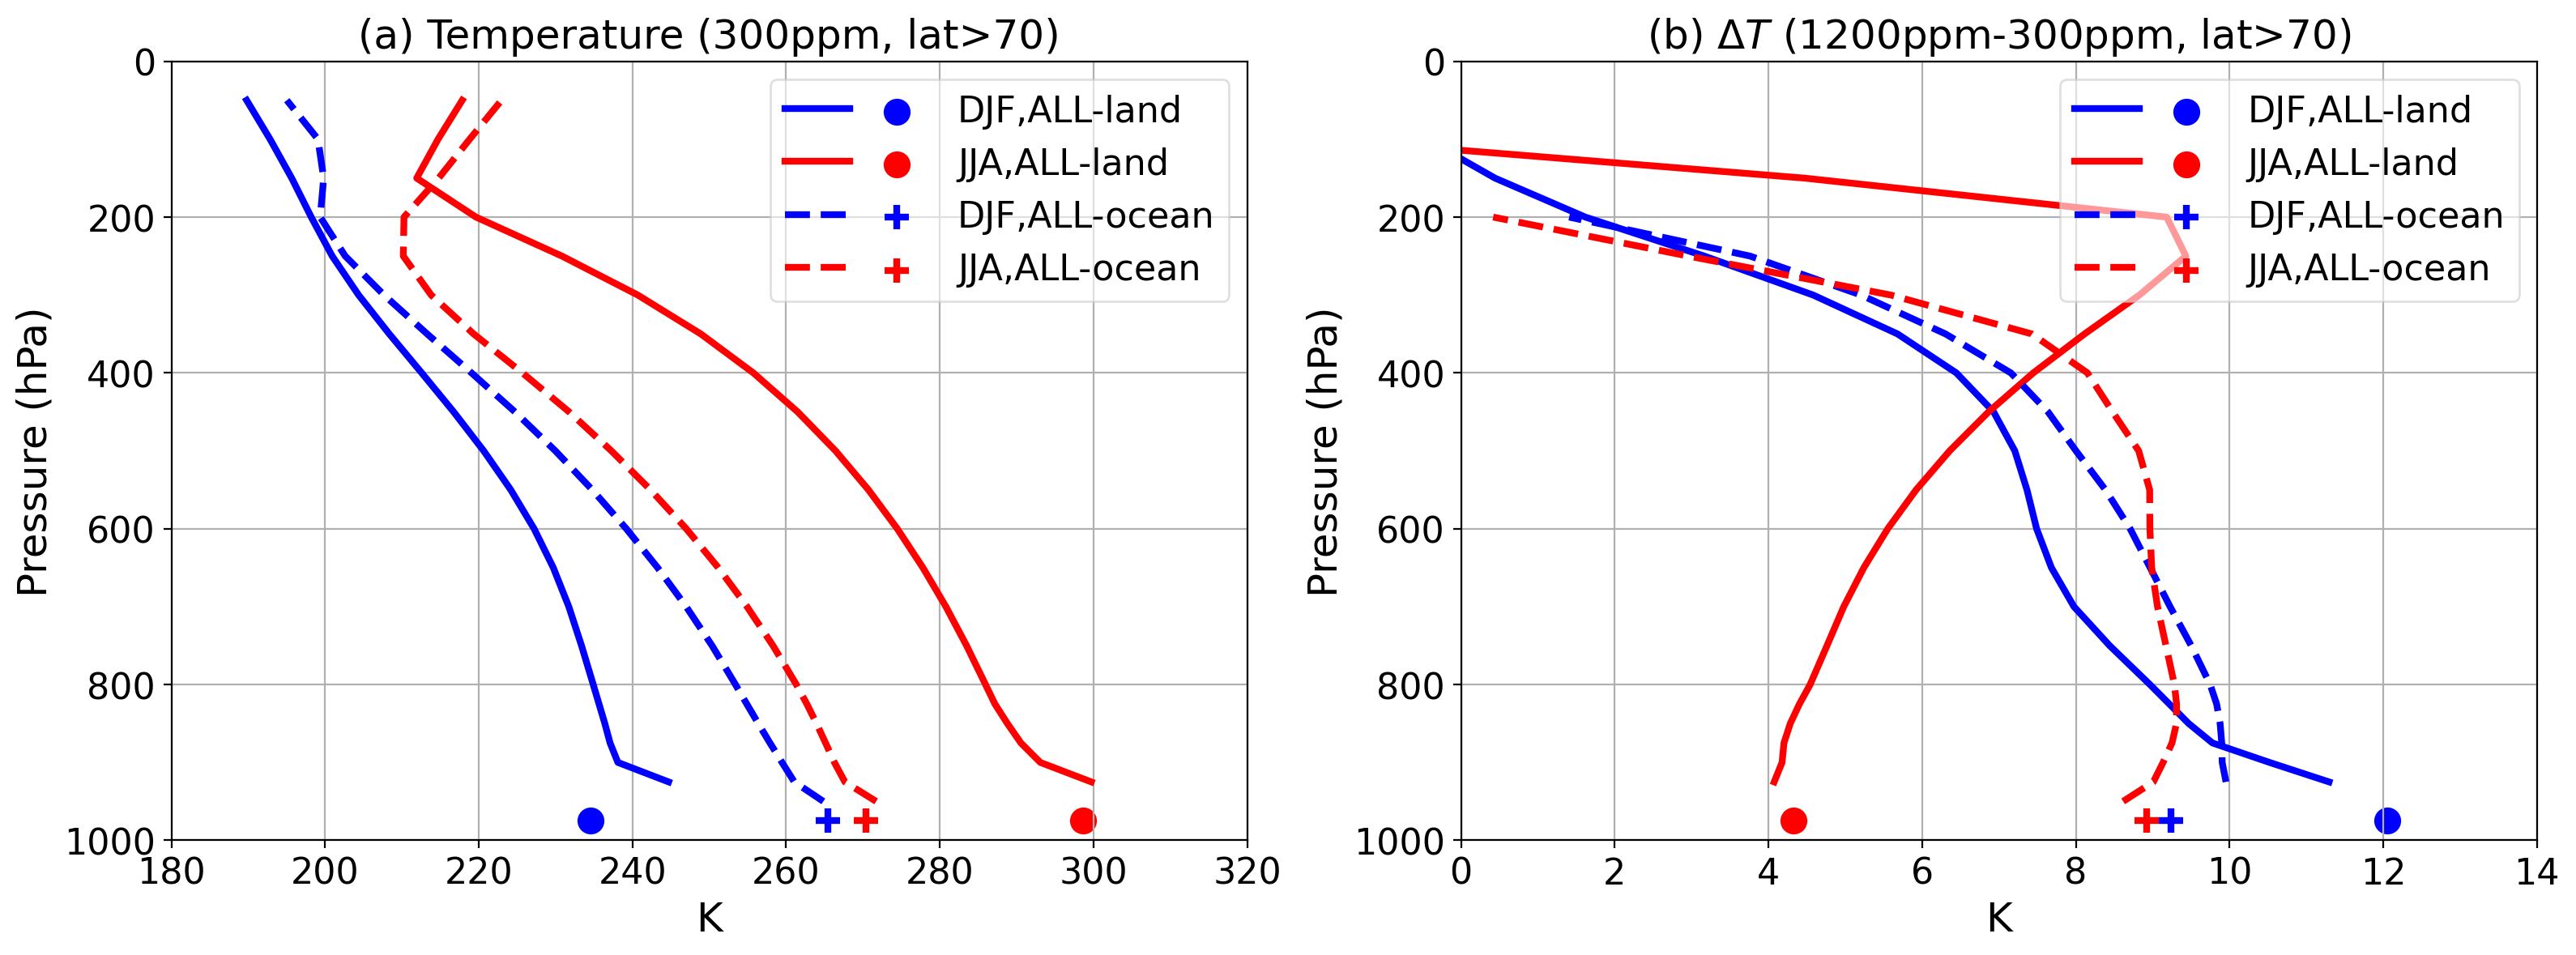

In [25]:
plt.figure(figsize=(16, 6),dpi=200)
plt.subplot(121)
p1, = ctl_300_ml2.temp.where(ctl_300_ml2.temp>0).isel(months=[0,1,2]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3)
p2, = ctl_300_ml2.temp.where(ctl_300_ml2.temp>0).isel(months=[6,7,8]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3)
p3 = plt.scatter(ctl_300_ml2.t_surf.isel(months=[0,1,2]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',s=120)
p4 = plt.scatter(ctl_300_ml2.t_surf.isel(months=[6,7,8]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',s=120)
p5, = ctl_300_ml20.temp.where(ctl_300_ml20.temp>0).isel(months=[0,1,2]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(ls='--',y='pfull',c='b',lw=3)
p6, = ctl_300_ml20.temp.where(ctl_300_ml20.temp>0).isel(months=[6,7,8]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').plot(ls='--',y='pfull',c='r',lw=3)
p7 = plt.scatter(ctl_300_ml20.t_surf.isel(months=[0,1,2]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',s=120, marker='+',lw=3)
p8 = plt.scatter(ctl_300_ml20.t_surf.isel(months=[6,7,8]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',s=120, marker='+',lw=3)
plt.xlim([180,320])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) Temperature (300ppm, lat>70)',fontsize=18)
plt.legend([(p1,p3),(p2,p4),(p5,p7),(p6,p8)],['DJF,ALL-land','JJA,ALL-land','DJF,ALL-ocean','JJA,ALL-ocean'],numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)},fontsize=16,loc='best',handlelength=4, framealpha=0.6)
plt.grid()

plt.subplot(122)
p1, = diff_ml2.temp.where(diff_ml2.temp<100).where(diff_ml2.temp>-10).isel(months=[0,1,2]).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3)
p2, = diff_ml2.temp.where(diff_ml2.temp<100).where(diff_ml2.temp>-10).isel(months=[6,7,8]).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3)
p3 = plt.scatter(diff_ml2.t_surf.isel(months=[0,1,2]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',s=120)
p4 = plt.scatter(diff_ml2.t_surf.isel(months=[6,7,8]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',s=120)
p5, = diff_ml20.temp.where(diff_ml20.temp<100).where(diff_ml20.temp>0).isel(months=[0,1,2]).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(ls='--',y='pfull',c='b',lw=3)
p6, = diff_ml20.temp.where(diff_ml20.temp<100).where(diff_ml20.temp>0).isel(months=[6,7,8]).where(ctl_300.lat>70).mean(('months','lon')).weighted(weights).mean('lat').plot(ls='--',y='pfull',c='r',lw=3)
p7 = plt.scatter(diff_ml20.t_surf.isel(months=[0,1,2]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='b',s=120, marker='+',lw=3)
p8 = plt.scatter(diff_ml20.t_surf.isel(months=[6,7,8]).where(ctl_300.lat>70).mean(('months','lon'),skipna=True).weighted(weights).mean('lat').values,975,c='r',s=120, marker='+',lw=3)
plt.xlim([0,14])
plt.ylim([1000,0])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) $\Delta T$ (1200ppm-300ppm, lat>70)',fontsize=18)
plt.legend([(p1,p3),(p2,p4),(p5,p7),(p6,p8)],['DJF,ALL-land','JJA,ALL-land','DJF,ALL-ocean','JJA,ALL-ocean'],numpoints=1,handler_map={tuple: HandlerTuple(ndivide=None)},fontsize=16,loc='best',handlelength=4, framealpha=0.6)
plt.grid()

plt.tight_layout()
plt.savefig('fig10.eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


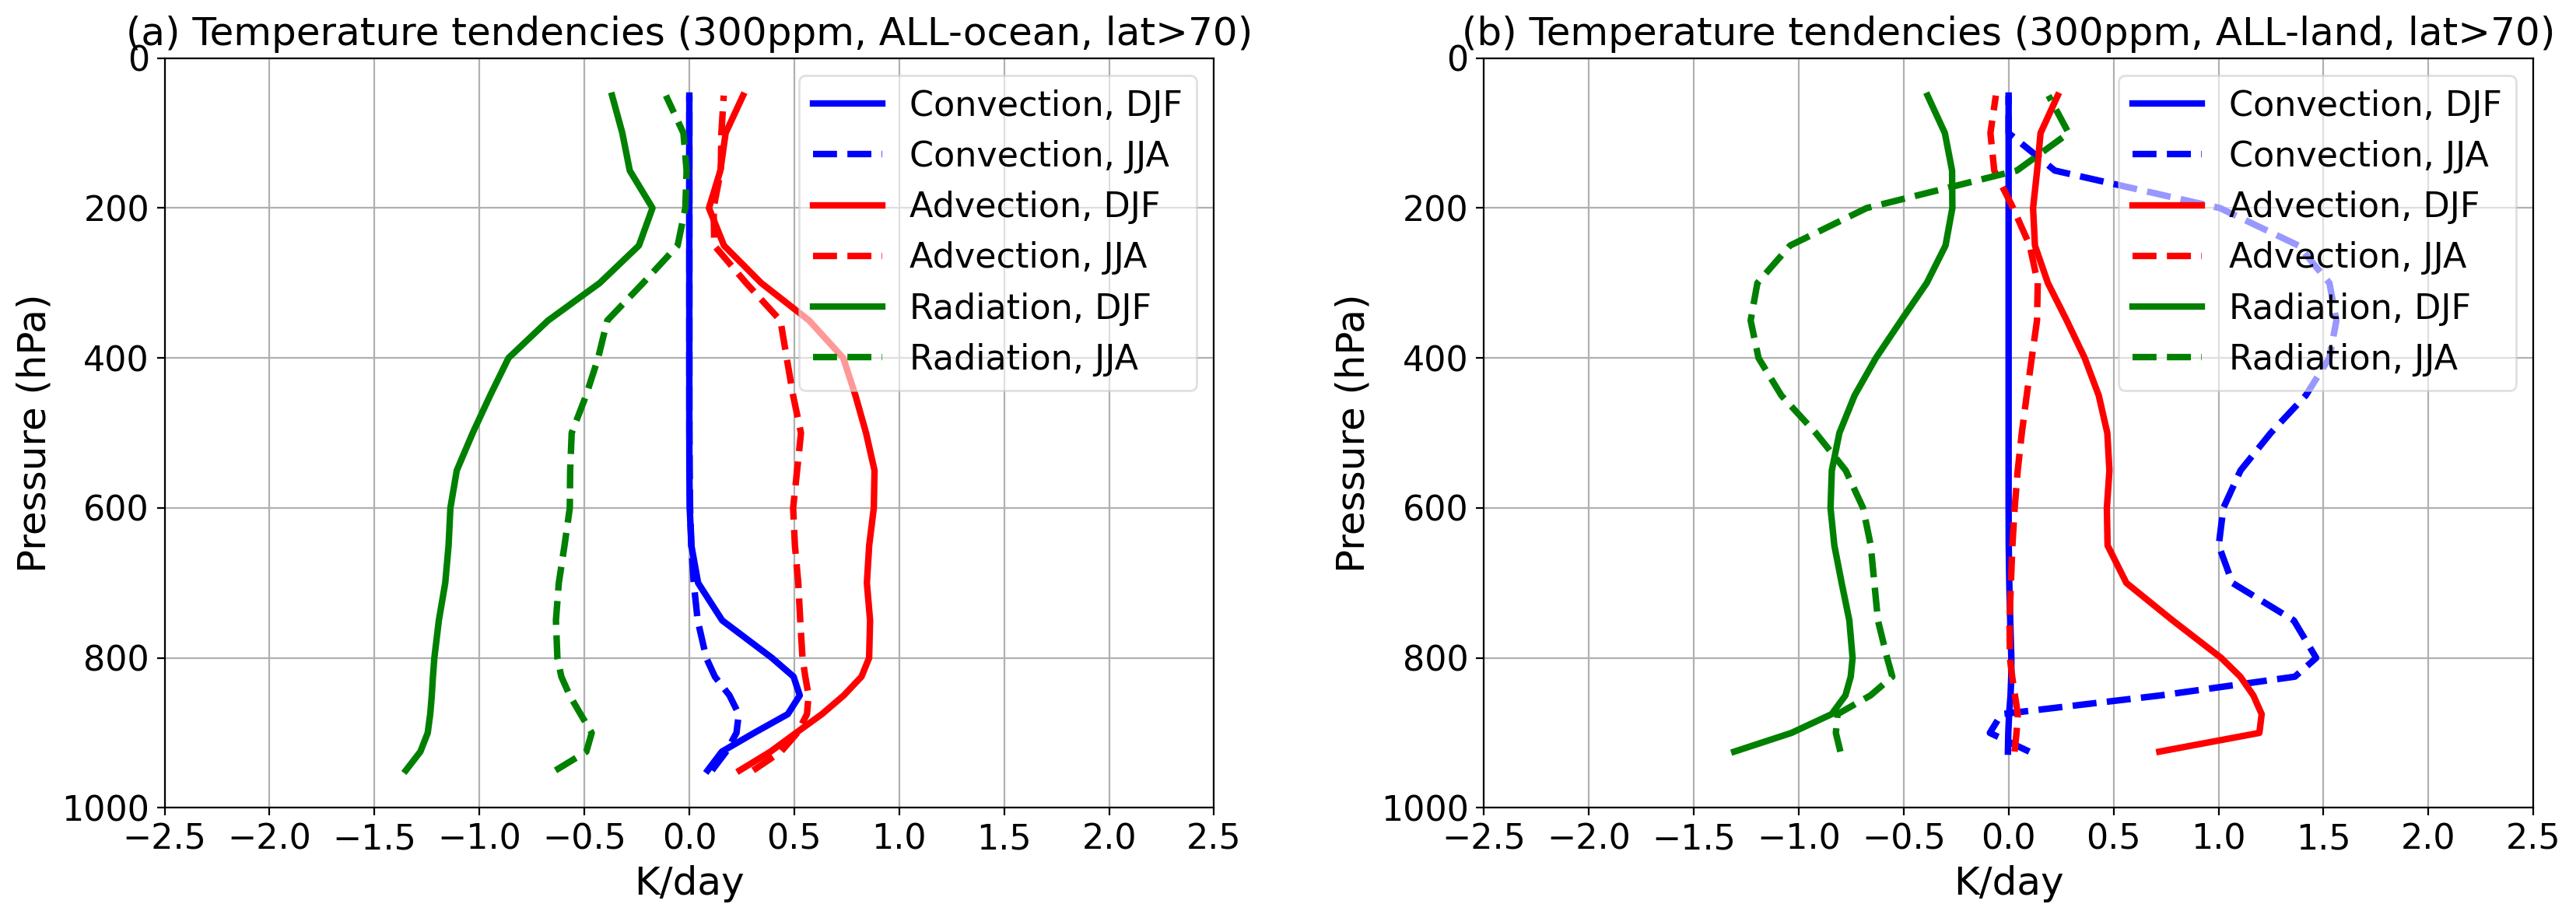

In [18]:
plt.figure(figsize=(17, 6),dpi=200)
plt.subplot(121)
(ctl_300_ml20.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='Convection, DJF')
(ctl_300_ml20.dt_tg_convection*3600*24).isel(months=[6,7,8]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',ls='--',lw=3,label='Convection, JJA')
(ctl_300_ml20.dt_tg_advection*3600*24).isel(months=[0,1,2]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='Advection, DJF')
(ctl_300_ml20.dt_tg_advection*3600*24).isel(months=[6,7,8]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',ls='--',lw=3,label='Advection, JJA')
(ctl_300_ml20.soc_tdt_rad*3600*24).where(ctl_300_ml20.soc_tdt_rad*3600*24>-2).isel(months=[0,1,2]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',lw=3,label='Radiation, DJF')
(ctl_300_ml20.soc_tdt_rad*3600*24).where(ctl_300_ml20.soc_tdt_rad*3600*24>-2).isel(months=[6,7,8]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',ls='--',lw=3,label='Radiation, JJA')
plt.xlim([-2.5,2.5])
plt.ylim([1000,0])
plt.xticks(np.linspace(-2.5,2.5,11),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K/day',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(a) Temperature tendencies (300ppm, ALL-ocean, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16, framealpha=0.6)
plt.grid()

plt.subplot(122)
(ctl_300_ml2.dt_tg_convection*3600*24).isel(months=[0,1,2]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',lw=3,label='Convection, DJF')
(ctl_300_ml2.dt_tg_convection*3600*24).isel(months=[6,7,8]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='b',ls='--',lw=3,label='Convection, JJA')
(ctl_300_ml2.dt_tg_advection*3600*24).isel(months=[0,1,2]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',lw=3,label='Advection, DJF')
(ctl_300_ml2.dt_tg_advection*3600*24).isel(months=[6,7,8]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='r',ls='--',lw=3,label='Advection, JJA')
(ctl_300_ml2.soc_tdt_rad*3600*24).where(ctl_300_ml2.soc_tdt_rad*3600*24>-2).isel(months=[0,1,2]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',lw=3,label='Radiation, DJF')
(ctl_300_ml2.soc_tdt_rad*3600*24).where(ctl_300_ml2.soc_tdt_rad*3600*24>-2).isel(months=[6,7,8]).mean('months').where(ctl_300.lat>70).mean(('lon')).weighted(weights).mean('lat').plot(y='pfull',c='g',ls='--',lw=3,label='Radiation, JJA')
plt.xlim([-2.5,2.5])
plt.ylim([1000,0])
plt.xticks(np.linspace(-2.5,2.5,11),fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('K/day',fontsize=18)
plt.ylabel('Pressure (hPa)',fontsize=18)
plt.title('(b) Temperature tendencies (300ppm, ALL-land, lat>70)',fontsize=18)
plt.legend(loc='best',fontsize=16, framealpha=0.6)
plt.grid()

plt.tight_layout()
plt.savefig('fig11.eps')
plt.show()